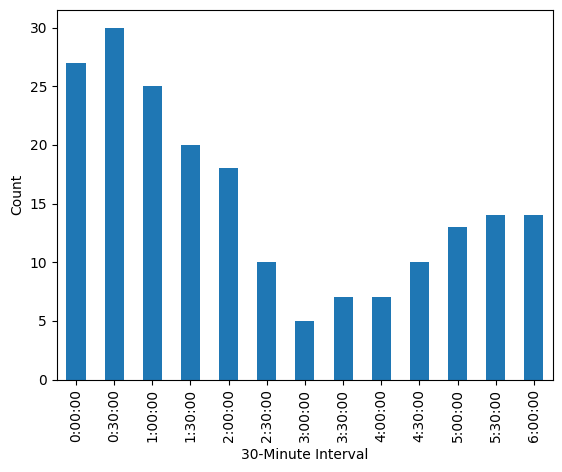

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("./mydata/spy_data_gap_fill_time.csv")
# create the time bins
df = (df[df["is_gap_fill"] == True])
df['datetime'] = pd.to_datetime(df['gap_fill_time'])
# extract only the time component
df['time'] = df['datetime'].dt.time
df['time'] = df['time'].astype(str)
df['minute'] = df['time'].apply(lambda x: int(x.split(':')[0]) * 60 + int(x.split(':')[1]))
df['30min_interval'] = (df['minute'] // 30 * 30).astype(int)
df['30min_interval'] = (df['30min_interval'] // 60).astype(str) + ':' + (df['30min_interval'] % 60).astype(str).str.zfill(2) + ':00'
# group the DataFrame by the 30min_interval column
grouped = df.groupby('30min_interval')

grouped['Date'].count().plot(kind='bar')

# set the x-axis label
plt.xlabel('30-Minute Interval')

# set the y-axis label
plt.ylabel('Count')

# show the plot
plt.show()